In [10]:
%load_ext autoreload
%autoreload
%matplotlib inline

import io
import os
import sys
import django
import glob
import json
import re
import requests
import pandas as pd
from IPython.core.debugger import set_trace
from pathlib import Path
from django.core.files.base import ContentFile
from rest_framework import serializers
from tqdm.notebook import tqdm
from PIL import Image, ImageSequence

parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parentdir)
django.setup()

import getch.models as m
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic') #맥
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
tags = m.Tag.objects.values()

In [3]:
df = pd.DataFrame(tags).drop(['id','pix_id','x','y','created_at'], axis=1); df

,type,category,item,color,detail,pattern,texture,look,length,sleeve_length,...,fit,shape,heel_height,heel_shape,toe_type,sole_type,strap,size,main_material,sub_material
0,clothing,탑,탱크탑,그레이,None,무지,면,히피,크롭,민소매,...,타이트,None,None,None,None,None,False,None,None,None
1,clothing,청바지,청바지,블루,포켓,무지,데님,캐주얼,롱,None,...,노멀,스트레이트,None,None,None,None,False,None,None,None
2,clothing,캐주얼상의,티셔츠,스카이블루,None,무지,니트,캐주얼,노멀,반팔,...,노멀,None,None,None,None,None,False,None,None,None
3,clothing,스커트,스커트,네이비,스트랩,무지,합성섬유,캐주얼,롱,None,...,None,H라인,None,None,None,None,False,None,None,None
4,shoes,운동화,슬립온,블랙,레이스업,무지,가죽,None,None,None,...,None,None,플랫,None,라운드토,플랫폼,False,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,shoes,운동화,런닝화,블랙,레이스업,로고,스웨이드,None,None,None,...,None,None,플랫,None,라운드토,플랫폼,False,None,None,None
5433,clothing,재킷,트럭커,베이지,포켓,무지,면,캐주얼,노멀,긴팔,...,노멀,None,None,None,None,None,False,None,None,None
5434,hats,모자,버킷햇,블랙,None,무지,면,None,None,None,...,None,None,None,None,None,None,False,None,None,None
5435,clothing,패딩,패딩,그레이,퀼팅,무지,합성섬유,캐주얼,노멀,긴팔,...,노멀,None,None,None,None,None,False,None,None,None


In [80]:
df.category.unique()

array(['탑', '청바지', '캐주얼상의', '스커트', '운동화', '재킷', '잡화', '가방', '모자', '점퍼',
       '팬츠', '블라우스', '부츠/워커', '베스트', '목걸이', '니트웨어', '로퍼', '셔츠', '코트',
       '드레스', '샌들', '점프수트', '슬리퍼', '펌프스', '정장구두', '패딩', '팔찌/발찌', '반지',
       '귀걸이/피어싱', '수영복', '지갑', '펜던트'], dtype=object)

In [22]:
plt.rc('font', size=13)

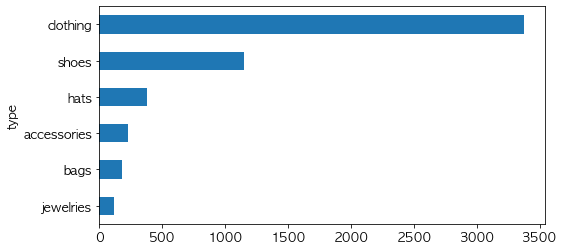

In [30]:
df.groupby(['type']).count()['item'].sort_values().plot.barh(figsize=(8,4));

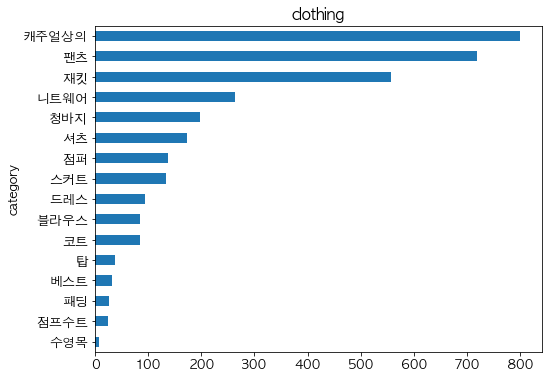

In [36]:
df.groupby(['type','category']).count().loc['clothing', 'item'].sort_values().plot.barh(figsize=(8,6), title='clothing');

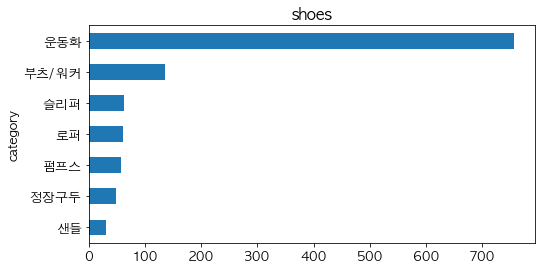

In [37]:
df.groupby(['type','category']).count().loc['shoes', 'item'].sort_values().plot.barh(figsize=(8,4), title='shoes');

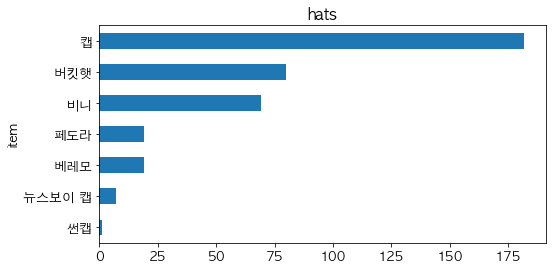

In [53]:
df.groupby(['category','item']).count().loc['모자', 'color'].sort_values().plot.barh(figsize=(8,4), title='hats');

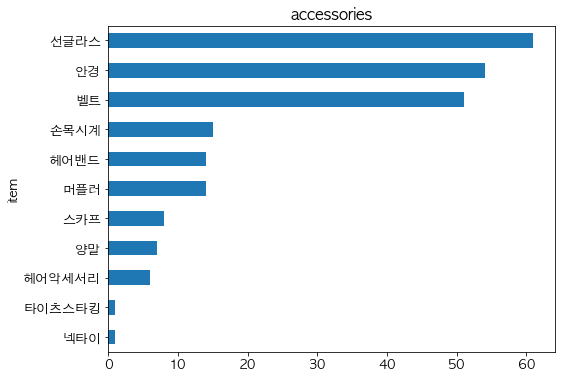

In [57]:
df.groupby(['category','item']).count().loc['잡화', 'color'].sort_values().plot.barh(figsize=(8,6), title='accessories');

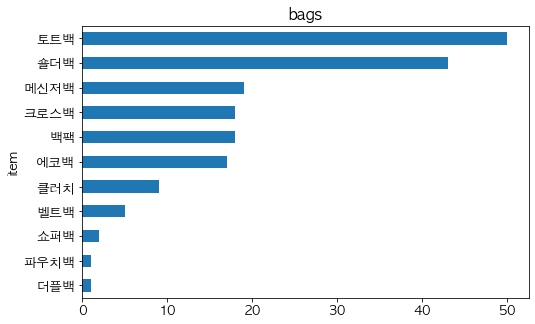

In [66]:
df.groupby(['category','item']).count().loc['가방', 'color'].sort_values().plot.barh(figsize=(8,5), title='bags');